# Álgebra Líneal
---

**NoteBook By:** 
- **Data Scientist Internship:** Julio César Martínez Izaguirre

# Tabla de Contenido
---

1. Inicialización.
2. Carga de Datos.
3. Análisis Exploratorio de Datos.
4. Prueba de la Ofuscación de Datos.
5. Prueba de la Regresión Líneal.
6. Apéndice A: Escribir Fórmulas en Notebook.
7. Apéndice B: Propiedades de las Matrices.
8. Bibliografía.
9. Agradecimientos.

# Introducción
---

**Datos Curiosos Sobre los Seguros**

En la antigua Babilonia se indemnizaba a las esposas de los guerreros en caso de muerte. Quizá este sea uno de los primeros ejemplos de un seguro de vida como prestación laboral.

La aseguradora londinense Lloyd´s firmó con una empresa cinematográfica una póliza de vida que cubría a todos los espectadores de sus películas en caso de que alguno sufriera una muerte repentina por un ataque de risa. 

Suena a película de ciencia ficción, pero hay aseguradoras que ofrecen seguros de vida en caso de apocalipsis zombi o incluso si hay una invasión extraterrestre; de hecho, algunas compañías han llegado a ofrecer coberturas en caso de maldiciones, hechizos o fenómenos paranormales.

La primera forma oficial de seguros fueron los fenicios quienes crearon las primeras empresas aseguradoras relacionadas con el comercio marítimo. Si un barco mercante no llegaba a puerto, su valor económico era devuelto en función de la mercancía transportada a cambio de que se realizará un pago antes de que el barco partiera.

La primera póliza de la que se tiene constancia está fechada en el año 1347. Se redactó y firmó en Génova para asegurar contra posibles accidentes, naufragios o asaltos piratas al navío mercante Santa Bárbara que cubría el trayecto desde Génova a Mallorca. 

En México en 1789 se constituyó la primera empresa de seguros, llamada “Compañía de Seguros Marítimos de Nueva España”. Esto para satisfacer la protección marítima en el Puerto de Veracruz, que a fines del siglo XVIII gozaba de gran prosperidad comercial.

Ésta daría paso al establecimiento de otras aseguradoras y, en general, al desarrollo de la actividad aseguradora en nuestro país(México).

**ACTUALIDAD Y RIESGOS**

En el tercer trimestre de 2022 se registró un producto interno bruto de $1.07B MX, evidenciando un alza de 1.61% con respecto al trimestre anterior.

Según DENUE 2022, Compañías de Seguros y Fianzas registró 1,994 unidades económicas. Las entidades federativas con mayor número de unidades económicas fueron Ciudad de México (241), Jalisco (137) y Nuevo León (119).

En cuanto a riesgos México ocupó el primer lugar de la región con 67% de intentos de ataque en 2021.

Por estas razones las compañías de seguros están comprometidas con sus clientes ofreciéndoles servicios de alta calidad y para asegurarse de que así suceda ahora las compañías hacen uso de la tecnología para mejorar los resultados que obtienen frente a sus clientes. Este es el caso de nuestro proyecto en el cuál trabajaremos a continuación.

# Descripción del Proyecto

---

La compañía de seguros **Sure Tomorrow** quiere resolver varias tareas con la ayuda de machine learning y nos pide que evaluemos esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento de datos u ofuscación de datos. Pero los datos deben protegerse de tal manera que la calidad de los modelos de machine learning no se vea afectada. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
#pip install scikit-learn --upgrade

In [2]:
# importando librerías
import numpy as np
import pandas as pd
import math
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Cargar datos y un primer vistaso a los errores más obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
df.head()

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


revisión de columnas y valores

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# la columna 'age' es de tipo float pero debería ser int por su naturaleza, vamos a cambiarlo
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Ahora veamos las estadísticas descriptivas de los datos

In [7]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Observaciones**

* Todo parece estar bien con los datos, no hay valores ausentes o nulos. 

* El género tiene un promedio del 50% es decir la mitad de nuestro dataset son hombres y la mitad mujeres. 

* El ingreso promedio es de 39000. 

* La taza de integrantes de una familia va de 1 a 6 integrantes siendo 1 el promedio.

* Los beneficios recibidos practicamente son nulos.

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

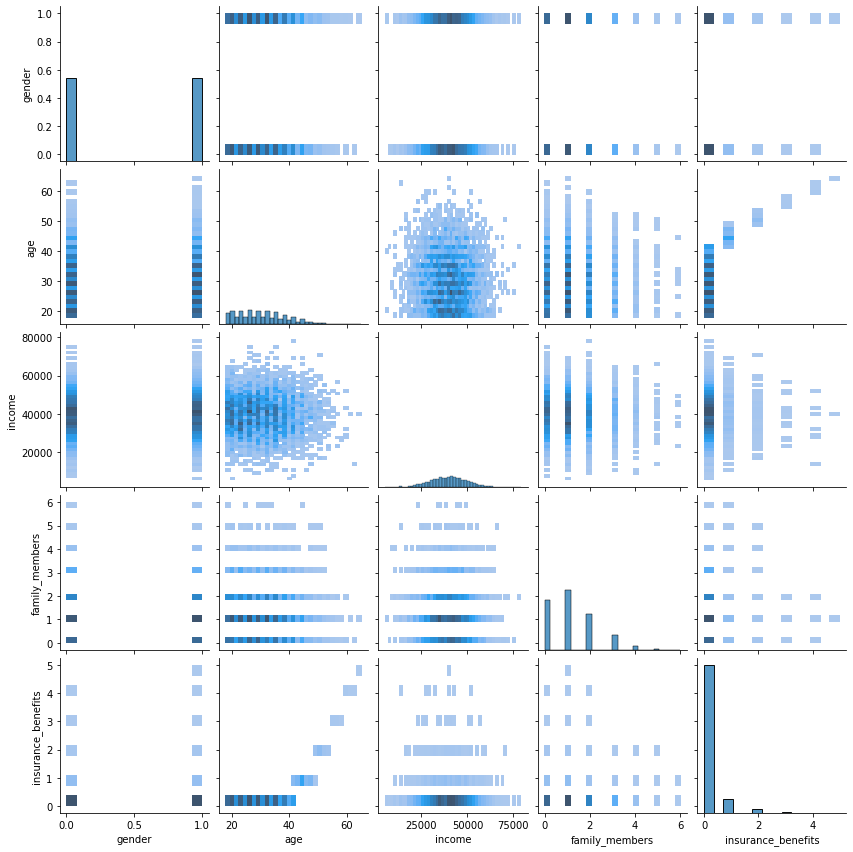

In [8]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Los temas clave para resolver esta tarea residen en:
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Vamos a escribir una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Podemos utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o la propia implementación.

Probaremos esta función para cuatro combinaciones de dos casos:

- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

**Responderemos a estas preguntas:**
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [9]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [10]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n : número de objetos para los que se buscan los vecinos más cercanos    
    :param k : número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = sklearn.neighbors.NearestNeighbors(metric=metric).fit(df[feature_names])  
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat(
        [df.iloc[nbrs_indices[0]], 
        pd.DataFrame(
            nbrs_distances.T,
            index=nbrs_indices[0],
            columns=['distance']
        )], axis=1
    )
    
    return df_res

Escalar datos.

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [12]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
657,1.0,0.569231,0.674684,0.000000,0
708,0.0,0.538462,0.360759,0.000000,0
1639,0.0,0.323077,0.294937,0.666667,0
1030,0.0,0.307692,0.583544,0.166667,0
1264,1.0,0.400000,0.429114,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

Combinación 1

In [13]:
## Combinación 1: Índice 75, distancia euclidiana por edad sin escalar
comb_1 = get_knn(df, 75, 10, 'euclidean')
comb_1

,gender,age,income,family_members,insurance_benefits,distance
75,0,48,49500.0,0,1,0.000000
465,0,46,49500.0,0,1,2.000000
4586,0,45,49500.0,0,1,3.000000
1033,1,33,49500.0,1,0,15.066519
38,1,31,49500.0,1,0,17.058722
4332,0,28,49500.0,3,0,20.223748
2626,1,23,49500.0,1,0,25.039968
853,0,21,49500.0,0,0,27.000000
4661,0,45,49600.0,0,1,100.044990
2349,1,46,49600.0,2,1,100.044990


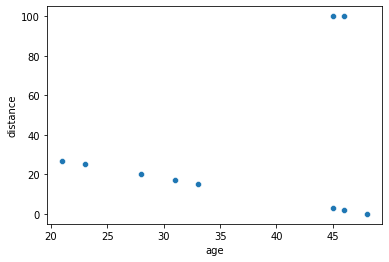

In [14]:
sns.scatterplot(data=comb_1, x="age", y="distance")
sns.set_theme(style='darkgrid');

Combinación 2

In [15]:
## Combinación 2: Indice 75, distancia manhattan por edad sin escalar
comb_2 = get_knn(df, 75, 10, 'manhattan')
comb_2

,gender,age,income,family_members,insurance_benefits,distance
75,0,48,49500.0,0,1,0.0
465,0,46,49500.0,0,1,2.0
4586,0,45,49500.0,0,1,3.0
1033,1,33,49500.0,1,0,17.0
38,1,31,49500.0,1,0,19.0
4332,0,28,49500.0,3,0,23.0
2626,1,23,49500.0,1,0,27.0
853,0,21,49500.0,0,0,27.0
4661,0,45,49600.0,0,1,103.0
2349,1,46,49600.0,2,1,105.0


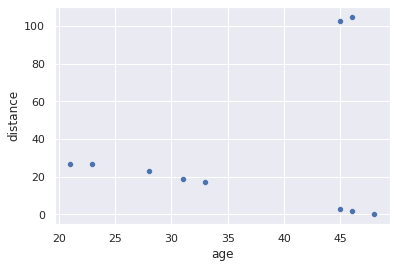

In [16]:
sns.scatterplot(data=comb_2, x="age", y="distance")
sns.set_theme(style='darkgrid');

Combinación 3

In [17]:
## Combinación 3: Índice 75, distancia euclidiana por edad, datos escalados.
comb_3 = get_knn(df_scaled, 75, 10, 'euclidean')
comb_3

,gender,age,income,family_members,insurance_benefits,distance
75,0.0,0.738462,0.626582,0.0,1,0.000000
465,0.0,0.707692,0.626582,0.0,1,0.030769
4868,0.0,0.707692,0.637975,0.0,1,0.032811
4820,0.0,0.707692,0.611392,0.0,1,0.034314
348,0.0,0.707692,0.597468,0.0,1,0.042360
4586,0.0,0.692308,0.626582,0.0,1,0.046154
4661,0.0,0.692308,0.627848,0.0,1,0.046171
222,0.0,0.692308,0.620253,0.0,1,0.046586
2891,0.0,0.692308,0.648101,0.0,1,0.050924
4513,0.0,0.707692,0.675949,0.0,1,0.058171


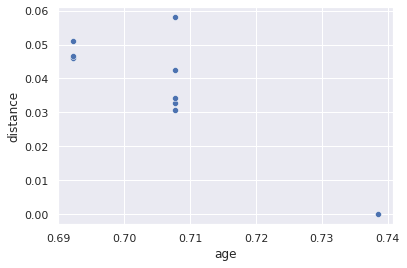

In [18]:
sns.scatterplot(data=comb_3, x="age", y="distance")
sns.set_theme(style='darkgrid');

Combinación 4

In [19]:
## Combinación 4: Índice 75, distancia manhattan por edad, datos escalados.
comb_4 = get_knn(df_scaled, 75, 10, 'manhattan')
comb_4

,gender,age,income,family_members,insurance_benefits,distance
75,0.0,0.738462,0.626582,0.0,1,0.000000
465,0.0,0.707692,0.626582,0.0,1,0.030769
4868,0.0,0.707692,0.637975,0.0,1,0.042162
4820,0.0,0.707692,0.611392,0.0,1,0.045959
4586,0.0,0.692308,0.626582,0.0,1,0.046154
4661,0.0,0.692308,0.627848,0.0,1,0.047420
222,0.0,0.692308,0.620253,0.0,1,0.052483
348,0.0,0.707692,0.597468,0.0,1,0.059883
2891,0.0,0.692308,0.648101,0.0,1,0.067673
730,0.0,0.676923,0.612658,0.0,1,0.075463


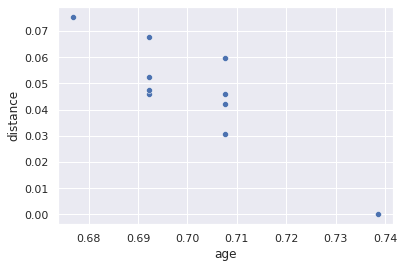

In [20]:
sns.scatterplot(data=comb_4, x="age", y="distance")
sns.set_theme(style='darkgrid');

Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Los datos que no estan escalados afectan al agoritmo KNN de tal forma que se ven afectadas las características por el peso que el algoritmo les da. Por ejemplo las edades van con números de los 18 a los 65 años mientras que el ingreso va de los 5 mil a los 79 mil, son números muy diferentes.

Si eso lo transformamos a una escala de unos y ceros es más fácil para el algoritmo ajustar todas las clases.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados entre la distancia eclidiana y manhattan suelen ser ligeramente distintos para este ejemplo.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evaluaremos si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construiremos un clasificador basado en KNN y mediremos su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. 

- Construiremos un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Dividiremos todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [21]:
# сalculando el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0

In [22]:
# comprobamos el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts()

False    4436
True      564
Name: insurance_benefits_received, dtype: int64

In [23]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [24]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



**Creación de Modelo de Clasificación KNN**

Modelo de clasificación para datos no escalados.

In [26]:
random = np.random.RandomState(42)

In [27]:
def knn_classifier(data):    
    k_range = range(1,11)

    ## Seleccionamos Objetivos
    X = data.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
    y = data['insurance_benefits_received']

    ## Hacemos Split de Datos.
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.3, 
        random_state=random
    )
    
    ## Bucle para los 10 vecinos más cercanos
    for k in k_range:
        knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred   = knn.predict(X_test)
        f1_score = sklearn.metrics.f1_score(y_test, y_pred)
        print("k_neighbors:", k)
        eval_classifier(y_test, y_pred)
        plt.scatter(
            x=k,
            y=f1_score
        )
        
    ## Graficamos
    plt.title('Metricas n_neighbors 1 - 10')
    plt.xlabel('K Neighbors')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.xticks([0,2,4,6,8,10])
    plt.style.use('ggplot')
    plt.show();

k_neighbors: 1
F1: 0.65
Matriz de confusión
[[0.87466667 0.018     ]
 [0.04666667 0.06066667]]
k_neighbors: 2
F1: 0.38
Matriz de confusión
[[0.89066667 0.002     ]
 [0.082      0.02533333]]
k_neighbors: 3
F1: 0.39
Matriz de confusión
[[0.88333333 0.00933333]
 [0.07933333 0.028     ]]
k_neighbors: 4
F1: 0.16
Matriz de confusión
[[0.88933333 0.00333333]
 [0.098      0.00933333]]
k_neighbors: 5
F1: 0.17
Matriz de confusión
[[0.88333333 0.00933333]
 [0.09666667 0.01066667]]
k_neighbors: 6
F1: 0.09
Matriz de confusión
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]
k_neighbors: 7
F1: 0.12
Matriz de confusión
[[0.89133333 0.00133333]
 [0.10066667 0.00666667]]
k_neighbors: 8
F1: 0.02
Matriz de confusión
[[0.89266667 0.        ]
 [0.106      0.00133333]]
k_neighbors: 9
F1: 0.04
Matriz de confusión
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
k_neighbors: 10
F1: 0.04
Matriz de confusión
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]


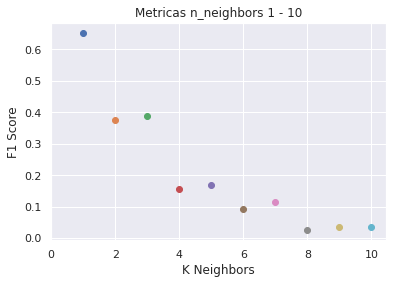

In [28]:
knn_classifier(df)

Modelo de clasificación para datos escalados.

In [29]:
df_scaled['insurance_benefits_received'] = df_scaled['insurance_benefits'] > 0

k_neighbors: 1
F1: 0.93
Matriz de confusión
[[0.89666667 0.004     ]
 [0.00933333 0.09      ]]
k_neighbors: 2
F1: 0.91
Matriz de confusión
[[9.00000000e-01 6.66666667e-04]
 [1.60000000e-02 8.33333333e-02]]
k_neighbors: 3
F1: 0.93
Matriz de confusión
[[0.89933333 0.00133333]
 [0.01133333 0.088     ]]
k_neighbors: 4
F1: 0.88
Matriz de confusión
[[0.90066667 0.        ]
 [0.02133333 0.078     ]]
k_neighbors: 5
F1: 0.92
Matriz de confusión
[[0.89933333 0.00133333]
 [0.01333333 0.086     ]]
k_neighbors: 6
F1: 0.89
Matriz de confusión
[[0.89933333 0.00133333]
 [0.01933333 0.08      ]]
k_neighbors: 7
F1: 0.91
Matriz de confusión
[[0.89866667 0.002     ]
 [0.01466667 0.08466667]]
k_neighbors: 8
F1: 0.88
Matriz de confusión
[[9.00000000e-01 6.66666667e-04]
 [2.06666667e-02 7.86666667e-02]]
k_neighbors: 9
F1: 0.89
Matriz de confusión
[[0.89933333 0.00133333]
 [0.018      0.08133333]]
k_neighbors: 10
F1: 0.88
Matriz de confusión
[[9.00000000e-01 6.66666667e-04]
 [2.00000000e-02 7.93333333e-02]]


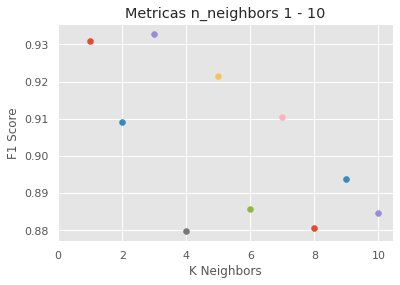

In [30]:
knn_classifier(df_scaled)

Podemos comprobar que al realizar un escalamiento de los datos obtenemos una métrica bastante buena para nuestro equilibrio armónico de recall y precision.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúar cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Comprobaremos la RECM tanto para los datos originales como para los escalados. ¿Podremos ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [31]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.w0 = 0

    def predict(self, X):
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights) + self.w0
        
        return y_pred

In [32]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

Implementación de la clase con datos sin escalar

In [33]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(pd.Series(lr.weights))
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

0   -9.435390e-01
1    3.574955e-02
2    1.642727e-02
3   -2.607437e-07
4   -1.169021e-02
dtype: float64

RMSE: 0.34
R2: 0.66


Comprobamos que nuestra clase funciona correctamente usando la librería sklearn

In [34]:
## Instanciar Modelo y Entrenar
lrm = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

## Obtener Predicciones
y_pred = lrm.predict(X_test)

## Métricas de Evaluación
eval_regressor(y_test, y_pred)

RMSE: 0.34
R2: 0.66


Implementación con datos escalados

In [35]:
Xs = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
ys = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(pd.Series(lr.weights))
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

0   -0.943539
1    2.323721
2    0.016427
3   -0.020599
4   -0.070141
dtype: float64

RMSE: 0.34
R2: 0.66


No se perciben cambios en las métricas de evaluación RMSE y R2 respecto a los datos escalados y no escalados.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [36]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [37]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [38]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [39]:
## Primera Matriz
X, X.shape

(array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
        [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
        [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
        ...,
        [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
        [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
        [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]]),
 (5000, 4))

In [40]:
## Segunda Matriz
P, P.shape

(array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
        [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
        [0.12811363, 0.45038594, 0.37079802, 0.92676499],
        [0.64386512, 0.82276161, 0.4434142 , 0.22723872]]),
 (4, 4))

In [41]:
## Comprobar que P es invertible.

I = scipy.linalg.inv(P)
I, I.shape

(array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
        [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
        [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
        [-0.11128575, -0.65813802,  1.74995517, -0.11816316]]),
 (4, 4))

In [42]:
## Multiplicamos
X1 = X @ I
X1, X1.shape

(array([[  70568.57281805,   79604.99119644, -101939.13289401,
          -76185.47202401],
        [  54048.80979419,   60995.09355036,  -78096.66144703,
          -58351.52617008],
        [  29865.34326964,   33709.76115145,  -43159.17256788,
          -32242.59233885],
        ...,
        [  48239.42485765,   54404.01248325,  -69671.30089712,
          -52080.7475985 ],
        [  46529.25691386,   52477.26160405,  -67202.19828898,
          -50232.96089551],
        [  57769.74628414,   65157.69802103,  -83442.42062486,
          -62367.89488412]]),
 (5000, 4))

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

*No. Es complicado visualizar los datos requeridos a simple vista.*

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [43]:
## Transponemos los datos, sin la transposición no es posible realizar la multiplicación.
p = (I @ X.T).T
p, p.shape

(array([[  31090.68184151,    6612.81630456, -101881.28609912,
           86770.56308007],
        [  23798.44668285,    5073.81142715,  -78032.25198525,
           66467.90376078],
        [  13145.99720717,    2804.87654797,  -43116.4943939 ,
           36729.97246399],
        ...,
        [  21262.23016186,    4518.38356092,  -69648.44157791,
           59310.0810094 ],
        [  20507.32662881,    4359.84530682,  -67178.88696057,
           57208.58908635],
        [  25457.50466113,    5410.4736735 ,  -83403.7054252 ,
           71029.52238866]]),
 (5000, 4))

Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [44]:
## Datos Originales.
pd.DataFrame(X, columns=personal_info_column_list)

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4995,0.0,28.0,35700.0,2.0
4996,0.0,34.0,52400.0,1.0
4997,0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0


In [45]:
## Datos invertidos
pd.DataFrame(X1, columns=personal_info_column_list)

,gender,age,income,family_members
0,70568.572818,79604.991196,-101939.132894,-76185.472024
1,54048.809794,60995.093550,-78096.661447,-58351.526170
2,29865.343270,33709.761151,-43159.172568,-32242.592339
3,59342.634304,66920.460050,-85703.149867,-64068.139516
4,37127.303502,41891.423093,-53641.127258,-40081.321009
...,...,...,...,...
4995,50793.460668,57295.858963,-73369.925394,-54837.868026
4996,74561.733635,84096.258688,-107695.761998,-80498.493300
4997,48239.424858,54404.012483,-69671.300897,-52080.747599
4998,46529.256914,52477.261604,-67202.198289,-50232.960896


In [46]:
## Datos Recuperados
pd.DataFrame(p, columns=personal_info_column_list).head()

,gender,age,income,family_members
0,31090.681842,6612.816305,-101881.286099,86770.563080
1,23798.446683,5073.811427,-78032.251985,66467.903761
2,13145.997207,2804.876548,-43116.494394,36729.972464
3,26159.078873,5555.873989,-85678.818887,72959.073159
4,16350.575548,3481.443336,-53599.125106,45655.290658


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

*Se debe a que la multiplicación de matrices entrega resultados diferentes*

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analíticamente_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

*La forma en que se relacionan $w$ y $wp$ es que ambas representan el valor de peso de la regresión en ambas fórmulas. Los valores predichos serían todas las observaciones (y) que se multiplican por las matrices previas a Y en la fórmula. Por lo tanto la calidad de la RECM no se ve afectada si comparamos ambas fórmulas.*

**Prueba analítica**

Vamos a demostrar lo siguiente

$$w_P = [(XP)^ T XP] ^ {-1} (XP)^T y$$

Considerando que $(AB)^{T} = B^{T} A^{T}$ entonces

$$w_P = [(P)^{T} (X^{T}X) P]^{-1} P^T X^T y$$

Luego, si... $(AB)^{-1} ) = B^{-1}A^{-1}$

$$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

De acuerdo con la propiedad de Identidad: $A^{-1} A = AA^{-1} = I$

$$w_P = P^{-1} (X^T X)^{-1} I X^T y$$

A su vez si $IA = AI = A$ entonces...

$$w_P = P^{-1} (X^T X)^{-1} X^T y$$

Si tomamos en cuenta que

$$w = (X^T X)^{-1} X^T y$$

Podemos concluir que...

$$w_P = P^{-1} w$$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- Utiliza $XP$ como la nueva matriz de características

Creamos matriz aleatoria

In [47]:
rdm = np.random.default_rng(seed=42)
pr  = rng.random(size=(df.shape[1], df.shape[1]))
pr

array([[0.55458479, 0.06381726, 0.82763117, 0.6316644 , 0.75808774,
        0.35452597],
       [0.97069802, 0.89312112, 0.7783835 , 0.19463871, 0.466721  ,
        0.04380377],
       [0.15428949, 0.68304895, 0.74476216, 0.96750973, 0.32582536,
        0.37045971],
       [0.46955581, 0.18947136, 0.12992151, 0.47570493, 0.22690935,
        0.66981399],
       [0.43715192, 0.8326782 , 0.7002651 , 0.31236664, 0.8322598 ,
        0.80476436],
       [0.38747838, 0.2883281 , 0.6824955 , 0.13975248, 0.1999082 ,
        0.00736227]])

Comprobamos que sea invertible

In [48]:
Ipr = np.linalg.inv(pr)
Ipr

array([[ 0.19632216,  0.89264857, -0.54922137,  0.98984238, -0.70499046,
        -0.12188734],
       [-0.79222807,  0.70768376,  0.57009685, -0.43049411,  0.41377447,
        -0.81111838],
       [-0.31311425, -1.0617258 , -0.06389105, -0.01325411,  0.20952064,
         2.91307206],
       [ 0.56198543,  0.38282955,  0.99278296,  0.12340715, -0.81543463,
        -1.38829467],
       [ 1.46578126,  0.6471724 , -0.21908087, -1.38679323,  0.59816677,
        -2.62626269],
       [-0.74847364, -1.11113904, -0.3947161 ,  1.30554605,  0.71301789,
         1.6255081 ]])

Creamos matriz X*P

In [49]:
xp = pr.dot(Ipr)
xp

array([[ 1.00000000e+00,  8.77353797e-17,  5.37858612e-17,
         1.48536918e-17,  6.13144953e-17,  3.20945187e-16],
       [ 6.33895681e-17,  1.00000000e+00, -2.18511698e-18,
         1.46108140e-16, -1.08636962e-18,  1.01201171e-17],
       [-7.44956710e-17, -1.53899866e-17,  1.00000000e+00,
         2.72804713e-17,  2.94783069e-17,  9.33143300e-17],
       [-3.23202182e-17,  9.21117669e-17,  5.79296689e-18,
         1.00000000e+00, -1.03797941e-16, -6.20957115e-17],
       [ 1.74846342e-16, -8.47585049e-17, -3.52750224e-17,
         5.06821310e-16,  1.00000000e+00,  3.16089701e-16],
       [-7.62488979e-17,  1.38743587e-18,  1.48869384e-16,
         2.40032089e-16, -2.81377582e-17,  1.00000000e+00]])

Creamos Data con matriz aleatoria

In [50]:
df_cl = pd.DataFrame(xp, columns=df.columns)
df_cl

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1.000000e+00,8.773538e-17,5.378586e-17,1.485369e-17,6.131450e-17,3.209452e-16
1,6.338957e-17,1.000000e+00,-2.185117e-18,1.461081e-16,-1.086370e-18,1.012012e-17
2,-7.449567e-17,-1.538999e-17,1.000000e+00,2.728047e-17,2.947831e-17,9.331433e-17
3,-3.232022e-17,9.211177e-17,5.792967e-18,1.000000e+00,-1.037979e-16,-6.209571e-17
4,1.748463e-16,-8.475850e-17,-3.527502e-17,5.068213e-16,1.000000e+00,3.160897e-16
5,-7.624890e-17,1.387436e-18,1.488694e-16,2.400321e-16,-2.813776e-17,1.000000e+00


Regresión con datos originales

In [51]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(pd.Series(lr.weights))
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

0   -0.943539
1    2.323721
2    0.016427
3   -0.020599
4   -0.070141
dtype: float64

RMSE: 0.34
R2: 0.66


Regresión con Datos Ofuscados

In [52]:
X = df_cl[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_cl['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(pd.Series(lr.weights))
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

0   -0.943539
1    2.323721
2    0.016427
3   -0.020599
4   -0.070141
dtype: float64

RMSE: 0.34
R2: 0.66


# Conclusiones

Después de pasar un tiempo analizando este proyecto llegamos a lo siguiente:

- Encontramos clientes que eran similares a un cliente determinado para el dpto de marketing.
- Predecimos la probabilidad de que un nuevo cliente reciba un beneficio de seguro comparando un modelo ficticio con uno real.
- Predecimos la cantidad de beneficios de seguro que probablemente recibirá un nuevo cliente utilizando un modelo de regresión lineal.
- Protegimos los datos personales de los clientes sin romper el modelo de la tarea anterior.

Desarrollamos un algoritmo de transformación de datos que dificultó la recuperación de la información personal si los datos caen en manos equivocadas. Esto lo denominamos enmascaramiento de datos y se protegieron de tal manera que la calidad de los modelos de machine learning no se vea afectada.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores 
- [x]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas    
    - [x]  Se respondieron las preguntas sobre la escala/distancia
- [x]  Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    
    - [x]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. 
    - [x]  Se calculó la métrica F1.
- [x]  Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales
    - [x]  Se calculó la RECM para la solución implementada
- [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    
    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    
    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    
    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
    - [x]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

# Bibliografía
---

> Los datos curiosos que debes conocer de los seguros. Latino Seguros(23/mar/2022). https://latinoseguros.com.mx/sitio2021/los-datos-curiosos-que-debes-conocer-de-los-seguros-de-vida/

> Acerca de Compañías de Seguros y Finanzas. DataMéxico(2022). https://datamexico.org/es/profile/industry/insurance-and-surety-companies#:~:text=Acerca%20de%20Compa%C3%B1%C3%ADas%20de%20Seguros%20y%20Fianzas&text=En%20el%20tercer%20trimestre%20de,Fianzas%20registr%C3%B3%201%2C994%20unidades%20econ%C3%B3micas.

> México, primer lugar en ciberataques en Latinoamérica. Forbes México(2021). https://www.forbes.com.mx/negocios-mexico-primer-lugar-en-ciberataques-en-latinoamerica/